In [45]:
import pandas as pd
import numpy as np

In [46]:
df = pd.read_csv('tulum.csv', sep=',', engine='python')

In [47]:
df['NFecha'] =  pd.to_datetime(df['FECHA'], format='%d/%m/%Y')

In [48]:
df['Año'] = df['NFecha'].dt.year
df['Mes'] = df['NFecha'].dt.month

In [49]:
df.describe()

,PRECIP,EVAP,TMAX,TMIN,Año,Mes
count,13763.000000,9863.000000,13388.000000,13385.000000,13796.000000,13796.000000
mean,3.125300,4.495387,30.991672,20.346328,1989.264062,6.667150
std,10.484947,2.057994,2.605869,3.989156,13.608035,3.474857
min,0.000000,0.000000,18.000000,4.300000,1964.000000,1.000000
25%,0.000000,3.000000,29.500000,18.000000,1978.000000,4.000000
50%,0.000000,4.300000,31.000000,21.000000,1989.000000,7.000000
75%,0.000000,5.800000,33.000000,23.000000,2001.000000,10.000000
max,200.000000,17.700000,45.000000,31.500000,2012.000000,12.000000


In [50]:
NumA = len(df['Año'].unique())

In [51]:
# 1) Número de días con heladas por año (FD: Tmin < 0ºC)
df.TMIN.min()
dhelada = df[df.TMIN < 0]
print(dhelada)

Empty DataFrame
Columns: [FECHA, PRECIP, EVAP, TMAX, TMIN, NFecha, Año, Mes]
Index: []


In [52]:
# Ya que se vió que no huvo días con temperatura menor a 0 grados
# Observaremos el día con la temperatura más baja.
df.TMIN.min()

dhelada = df[df.TMIN < df.TMIN.min() +.01]
print(dhelada)

           FECHA  PRECIP  EVAP  TMAX  TMIN     NFecha   Año  Mes
7223  10/02/1991     0.0   4.9  29.3   4.3 1991-02-10  1991    2


In [53]:
# 2) Número de días de verano (SU: Tmax > 25ºC)
dverano = df['TMAX'][df.TMAX > 25] 
print(dverano.count())
print('')
# Creando arreglos vacios
PctVerano = []
DatosV = []
CantidadV = []
# Para la cantidad de días de verano por año
for i in range(1963,2012):
    NumVerano= dverano[df['Año']==[i+1]].count()
    NumDatos= df['TMAX'][df['Año']==[i+1]].count()
    
    DatosV.append(NumDatos)
    CantidadV.append(NumVerano)
    PctVerano.append(NumVerano/NumDatos)
    
    print(i+1, NumVerano, ";", "Datos totales", NumDatos, 'Porcentaje Válido', ';', np.round(NumVerano/(NumDatos+0.01), decimals=2))
    

13113

1964 167 ; Datos totales 176 Porcentaje Válido ; 0.95
1965 330 ; Datos totales 361 Porcentaje Válido ; 0.91
1966 26 ; Datos totales 31 Porcentaje Válido ; 0.84
1967 62 ; Datos totales 62 Porcentaje Válido ; 1.0
1968 61 ; Datos totales 61 Porcentaje Válido ; 1.0
1969 147 ; Datos totales 150 Porcentaje Válido ; 0.98
1970 135 ; Datos totales 135 Porcentaje Válido ; 1.0
1971 363 ; Datos totales 365 Porcentaje Válido ; 0.99
1972 330 ; Datos totales 335 Porcentaje Válido ; 0.99
1973 361 ; Datos totales 365 Porcentaje Válido ; 0.99
1974 364 ; Datos totales 365 Porcentaje Válido ; 1.0
1975 225 ; Datos totales 242 Porcentaje Válido ; 0.93
1976 343 ; Datos totales 366 Porcentaje Válido ; 0.94
1977 364 ; Datos totales 364 Porcentaje Válido ; 1.0
1978 333 ; Datos totales 334 Porcentaje Válido ; 1.0
1979 364 ; Datos totales 365 Porcentaje Válido ; 1.0
1980 364 ; Datos totales 366 Porcentaje Válido ; 0.99
1981 271 ; Datos totales 275 Porcentaje Válido ; 0.99
1982 361 ; Datos totales 365 Porce

C:\Users\NTIC-USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in long_scalars



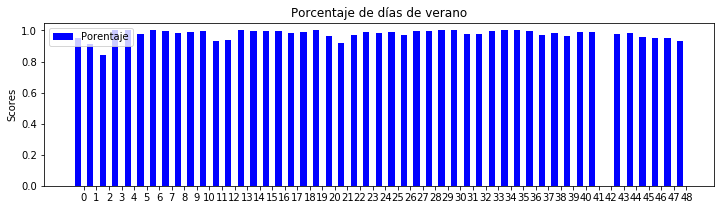

In [81]:
import numpy as np
import matplotlib.pyplot as plt


ind = np.arange(len(PctVerano))  # the x locations for the groups
width = 0.5  # the width of the bars
size = (15,8)
fig, ax = plt.subplots(figsize=(12,3))
rects1 = ax.bar(ind - width, PctVerano, width,
                color='Blue', label='Porentaje')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Porcentaje de días de verano')
ax.set_xticks(ind)
ax.legend()



plt.show()

In [88]:
# 3) Número de noches tropicales por año (TR: Tmin > 20ºC)
dTropicales = df['TMIN'][df.TMIN > 20]
print('Total de días tropicales registrados =', dTropicales.count())
print('')

# Creando arreglos vacios
PctTropical = []
DatosV = []
CantidadV = []

# Para la cantidad de días tropicales por por año
for i in range(1963,2012):
    NumTropical= dTropicales[df['Año']==[i+1]].count()
    NumDatos= df['TMIN'][df['Año']==[i+1]].count()
    
    DatosV.append(NumDatos)
    CantidadV.append(NumTropical)
    PctTropical.append(NumTropical/NumDatos)
    
    print(i+1, NumTropical, "-", "Datos totales", NumDatos, '-' ,'Porcentaje Válido', ';',
          np.round(NumTropical/(NumDatos+0.01), decimals=2))
    

Total de días tropicales registrados = 7498

1964 111 - Datos totales 176 - Porcentaje Válido ; 0.63
1965 268 - Datos totales 362 - Porcentaje Válido ; 0.74
1966 5 - Datos totales 31 - Porcentaje Válido ; 0.16
1967 36 - Datos totales 62 - Porcentaje Válido ; 0.58
1968 52 - Datos totales 61 - Porcentaje Válido ; 0.85
1969 149 - Datos totales 152 - Porcentaje Válido ; 0.98
1970 100 - Datos totales 135 - Porcentaje Válido ; 0.74
1971 296 - Datos totales 365 - Porcentaje Válido ; 0.81
1972 292 - Datos totales 335 - Porcentaje Válido ; 0.87
1973 266 - Datos totales 365 - Porcentaje Válido ; 0.73
1974 211 - Datos totales 365 - Porcentaje Válido ; 0.58
1975 40 - Datos totales 242 - Porcentaje Válido ; 0.17
1976 154 - Datos totales 366 - Porcentaje Válido ; 0.42
1977 178 - Datos totales 365 - Porcentaje Válido ; 0.49
1978 185 - Datos totales 334 - Porcentaje Válido ; 0.55
1979 205 - Datos totales 365 - Porcentaje Válido ; 0.56
1980 204 - Datos totales 366 - Porcentaje Válido ; 0.56
1981 99 - D

C:\Users\NTIC-USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning:

invalid value encountered in long_scalars



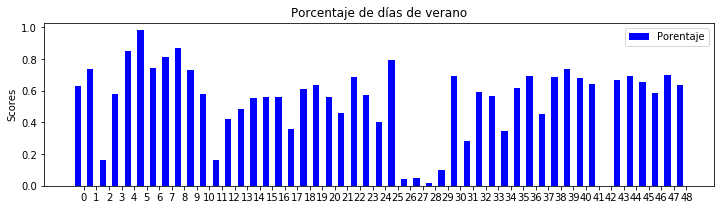

In [89]:
import numpy as np
import matplotlib.pyplot as plt


ind = np.arange(len(PctTropical))  # the x locations for the groups
width = 0.5  # the width of the bars
size = (15,8)
fig, ax = plt.subplots(figsize=(12,3))
rects1 = ax.bar(ind - width, PctTropical, width,
                color='Blue', label='Porentaje')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Porcentaje de días de verano')
ax.set_xticks(ind)
ax.legend()



plt.show()